In [1]:
# 1.导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin #对两个序列中的点进行举例匹配
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle #打乱排序

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]

uint8

(427, 640, 3)

[174 201 231]

(96615, 3)


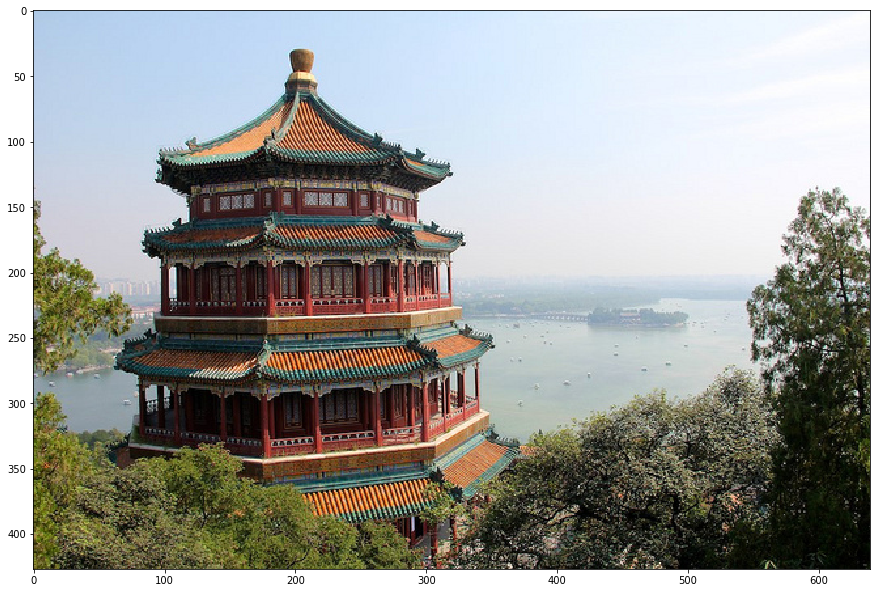

In [2]:
# 2.导入数据，探索数据
china = load_sample_image("china.jpg")
print(china)
print()
print(china.dtype)
print()
print(china.shape) #长度*宽度*像素
print()
print(china[0][0] ) #三个数决定一种颜色
print()

newimage = china.reshape((427 * 640,3)) #改变维度
print(pd.DataFrame(newimage).drop_duplicates().shape) #去除重复值
plt.figure(figsize=(15,15))
plt.imshow(china) #必须导入三维数组形成的图片

In [3]:
# 3.决定超参数，数据预处理
n_clusters = 64 #降到64种颜色

#plt.imshow在浮点数上表现更优秀
china = np.array(china, dtype=np.float64) / china.max() #数据归一化

#将图像格式转换成矩阵格式
w, h, d = original_shape = tuple(china.shape) #保存长度，宽度，像素
assert d == 3 #assert判断是否为True，不满足就报错
image_array = np.reshape(china, (w * h, d)) #改变维度为2维
print(image_array)
print()
print(image_array.shape)

[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]

(273280, 3)


In [4]:
# 4. 对数据进行K-Means的矢量量化
#首先使用1000个数据找出质心
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
print(kmeans.cluster_centers_.shape) #1000个样本返回64个质心
print()

#按照已存在的质心对所有数据进行聚类
labels = kmeans.predict(image_array)
print(labels.shape)
print()

#使用质心替换掉所有样本
image_kmeans = image_array.copy() #包含去重后的9万多种去重的颜色
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]
print(pd.DataFrame(image_kmeans).drop_duplicates().shape)
print()
image_kmeans = image_kmeans.reshape(w,h,d)
print(image_kmeans.shape)

(64, 3)

(273280,)

(64, 3)

(427, 640, 3)


In [5]:
# 5.对数据进行随机的矢量量化
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
print(labels_random.shape)
print()
len(set(labels_random))
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random = image_random.reshape(w,h,d)
print(image_random.shape)

(273280,)

(427, 640, 3)


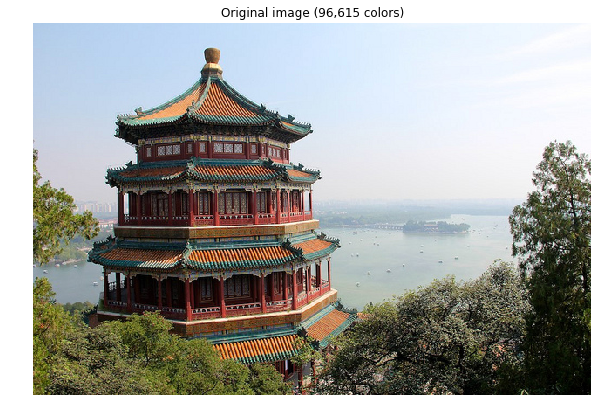

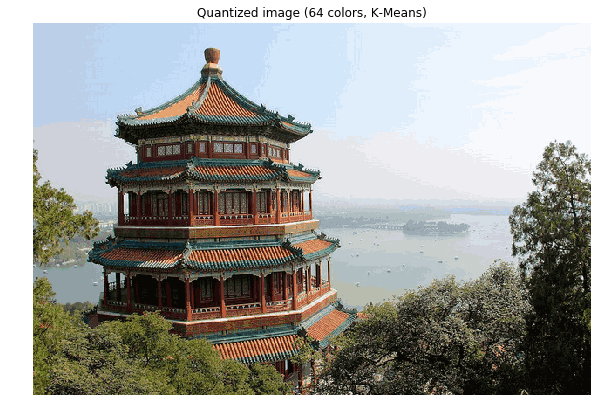

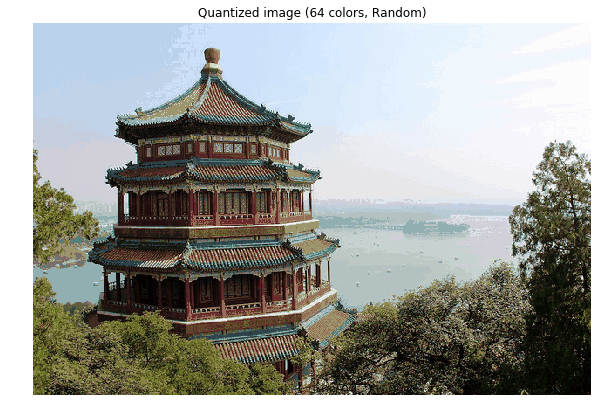

In [6]:
# 6.将原图，按KMeans矢量量化和随机矢量量化的图像绘制出来
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()